In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from data import read_preprocessed_data, outliers_statistics

df = read_preprocessed_data(std=False, outliers=False)

c:\Users\Noka9\Desktop\customer-profile-analysis\data/marketing_campaign.csv


In [2]:
outliers_statistics(df).head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent
Ilość wartości skrajnych,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,235.000000,178.000000,223.000000,...,1.000000,155.000000,145.00000,129.000000,126.000000,21.000000,20.000000,304.000000,0.0,0.0
Procent wartości skrajnych,0.0,0.0,0.0,0.0,0.0,0.0,0.007016,0.109916,0.083255,0.104303,...,0.000468,0.072498,0.06782,0.060337,0.058934,0.009822,0.009355,0.142189,0.0,0.0


In [3]:

incl= ['mean','std']
stat_cols = [col for col in df.columns if df[col].nunique()>9]
print(stat_cols)
for col in df.columns:
    if(col not in stat_cols):
        print(col)



['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Spent']
Education
Marital_Status
Kidhome
Teenhome
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Response


In [4]:
num_cols = pd.DataFrame(df,columns= stat_cols)#df.select_dtypes(include=['int', 'float'])
statystyki = {
'Średnia':num_cols.mean(),
'Mediana':num_cols.median(),
'Minimum':num_cols.min(),
'Maksimum':num_cols.max(),
'Odchylenie Standardowe':num_cols.std(),
'Skośność':num_cols.skew()
}
#statystyki = pd.DataFrame(statystyki).transpose()

In [5]:

other_cols = [col for col in df.columns if col not in stat_cols]

print(other_cols)

['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


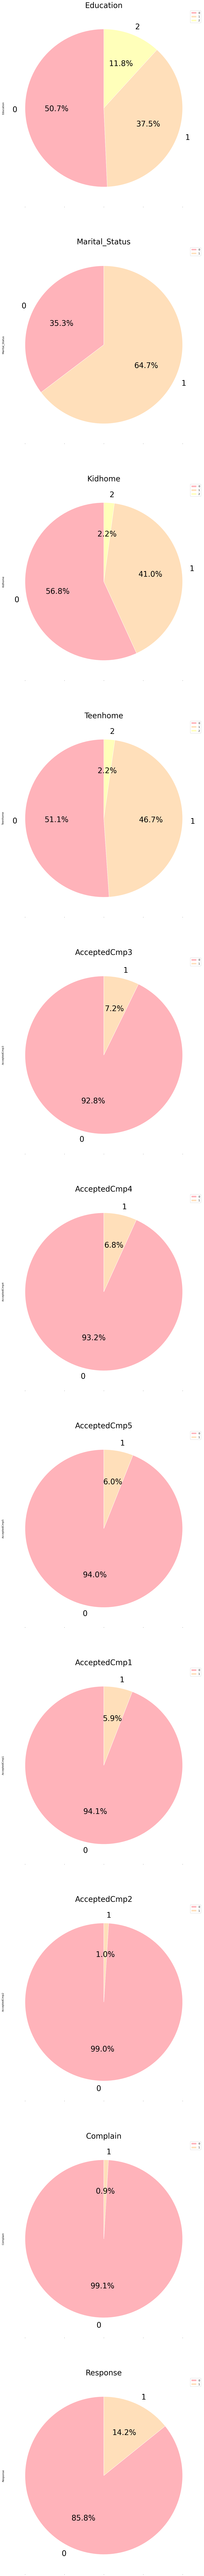

In [9]:
color_pallette = [
    '#FFB3BA',  # Pastel Pink  
    '#FFDFBA',  # Pastel Orange  
    '#FFFFBA',  # Pastel Yellow  
    '#BAFFC9',  # Pastel Green  
    '#BAE1FF',  # Pastel Blue  
    '#D4A5FF',  # Pastel Purple  
    '#FFC3A0',  # Pastel Peach  
    '#A0E8FF',  # Pastel Sky Blue  
    '#B5EAD7',  # Pastel Mint  
    '#F8C8DC',  # Pastel Rose  
]

ax = (
    df[other_cols]
    .astype(str)
    .apply(lambda x: x.value_counts())
    .plot(
        kind="pie",
        subplots=True,
        figsize=(15, 200),
        layout=(12, 1),
        colors=color_pallette,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=90,
        wedgeprops={'edgecolor': 'white'},
    )
)

for axis, col in zip(ax.flatten(), other_cols):
    for text in axis.texts:
        text.set_fontsize(30)
    axis.set_title(col, fontsize=30)

# plt.tight_layout()
plt.show()

In [ ]:
statystyki = pd.DataFrame(statystyki).transpose()

statystyki.head(n=6)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent
Średnia,50879.105341,48.961424,279.294758,25.664221,157.354213,37.224664,26.249241,41.633643,3.955490,2.498022,5.738872,5.275964,51.916419,570.714639
Mediana,50008.000000,49.000000,158.000000,8.000000,60.000000,12.000000,8.000000,23.000000,3.000000,1.000000,5.000000,6.000000,51.000000,322.000000
Minimum,5305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,8.000000
Maksimum,105471.000000,99.000000,1224.000000,145.737796,839.845757,201.893883,150.245018,199.411496,11.000000,10.000000,13.000000,13.000000,81.000000,2352.000000
Odchylenie Standardowe,20403.598573,28.991109,308.862418,37.493770,208.739214,53.326019,38.750789,48.234345,2.569373,2.640556,3.231473,2.276313,11.650036,580.785944
Skośność,0.061674,0.006627,1.082045,1.862357,1.697853,1.753940,1.879259,1.717051,0.740211,1.090687,0.785596,-0.307139,0.104079,0.891859
